In [44]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

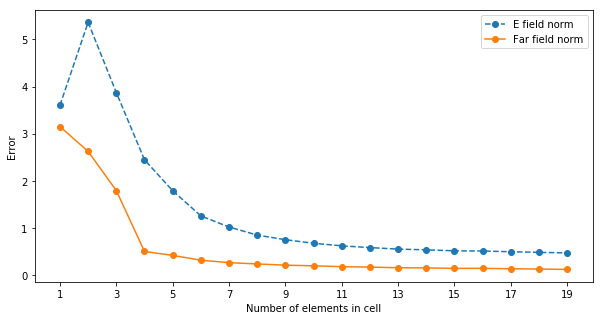

In [53]:
with open("results1.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in reader])

plt.plot(results[:, 0], results[:, 1], "o--", label="E field norm")
plt.plot(results[:, 0], results[:, 2], "o-", label="Far field norm")
#plt.yscale("log")
plt.xlabel("Number of elements in cell")
plt.ylabel("Error")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.legend()
#plt.show()
plt.savefig("compare.pdf", bbox_inches="tight")

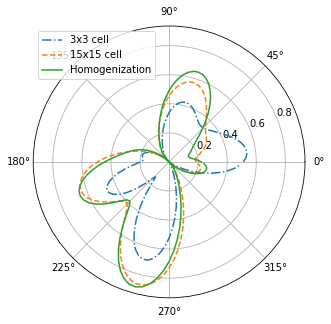

In [52]:
phi = np.linspace(0, 2 * np.pi, num = 120, endpoint = False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

legend = ("3x3 cell", "15x15 cell")
marker_type = ("-.", "--")
for i, file in enumerate(["ff_isotropic-3.npy", "ff_isotropic-15.npy"]):
    with open(file, "rb") as f:
        ff = np.load(f)
        ax.plot(phi, ff, marker_type[i], label = legend[i])
with open("ff_anisotropic-5.npy", "rb") as f:
    ff = np.load(f)
    ax.plot(phi, ff, label="Homogenization")
plt.legend()
#plt.show()
plt.savefig("farfield.pdf", bbox_inches="tight")

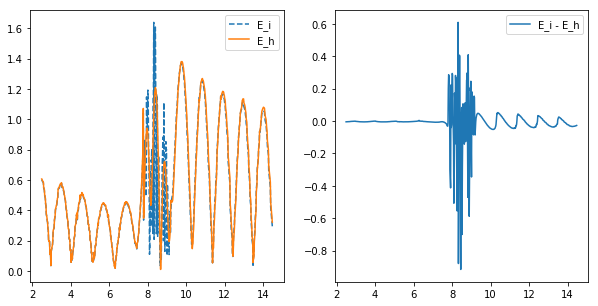

In [51]:
#
with open("plot_over_line.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[float(row[0]), float(row[1]), float(row[2])] for row in reader])

fig, [ax1, ax2] = plt.subplots(1, 2)    
ax1.plot(results[:, 0], results[:, 1], "--", label="E_i")
ax1.plot(results[:, 0], results[:, 2], "-", label="E_h")
ax2.plot(results[:, 0], results[:, 1] - results[:, 2], label="E_i - E_h")
ax2.legend()
ax1.legend()
#plt.show()
plt.savefig("line.pdf")